## Create Latitude and Longitude Combinations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from citipy import citipy

In [3]:
# create set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.0, high=90.0, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

## Generate Random World Cities

In [5]:
# create list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # add to cities list
    if city not in cities:
        cities.append(city)

# print the city count
len(cities)

597

In [6]:
import requests

# import the API key
from config import weather_api_key

# import the datetime module from the datetime library
from datetime import datetime

## 6.2.6 Get the City Weather Data

In [9]:
# Create an empty list to hold the weather data
city_data = []

# url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Print beginning for logging
print("Beginning Data Retrieval")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval
------------------------


In [10]:
#cities = ["Boston"]

In [24]:
# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # convert date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
    except:
        print("City not found. Skipping..")
        continue
    
# Data load complete
print("-------------------------------------------")
print("Data Retrieval Complete ")
print("-------------------------------------------")
    

Processing Record 48 of Set 12 | illoqqortoormiut
City not found. Skipping..
Processing Record 49 of Set 12 | petropavl
Processing Record 50 of Set 12 | mayo
Processing Record 51 of Set 12 | guerrero negro
Processing Record 52 of Set 12 | busselton
Processing Record 53 of Set 12 | dickinson
Processing Record 54 of Set 12 | alugan
Processing Record 55 of Set 12 | taolanaro
City not found. Skipping..
Processing Record 56 of Set 12 | rikitea
Processing Record 57 of Set 12 | bambous virieux
Processing Record 58 of Set 12 | saldanha
Processing Record 59 of Set 12 | grand river south east
City not found. Skipping..
Processing Record 60 of Set 12 | priyutovo
Processing Record 61 of Set 12 | lagoa
Processing Record 62 of Set 12 | katsuura
Processing Record 63 of Set 12 | batagay
Processing Record 64 of Set 12 | alekseyevsk
Processing Record 65 of Set 12 | nikolskoye
Processing Record 66 of Set 12 | geraldton
Processing Record 67 of Set 12 | campoverde
Processing Record 68 of Set 12 | provideni

In [12]:
len(city_data)

542

## 6.2.7 Create a DataFrame of City Weather Data

In [13]:
# convert array of dictionaries to Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Petropavl,54.8753,69.1628,36.01,93,39,6.80,KZ,2021-09-22 19:03:27
1,Mayo,38.8876,-76.5119,83.17,77,20,15.99,US,2021-09-22 19:03:27
2,Guerrero Negro,27.9769,-114.0611,82.06,58,100,6.24,MX,2021-09-22 18:58:39
3,Busselton,-33.6500,115.3333,51.04,91,0,10.07,AU,2021-09-22 19:03:27
4,Dickinson,29.4608,-95.0513,83.23,43,1,4.00,US,2021-09-22 19:03:28
5,Alugan,12.2188,125.4808,78.03,85,100,2.10,PH,2021-09-22 19:03:28
6,Rikitea,-23.1203,-134.9692,73.27,75,19,20.76,PF,2021-09-22 19:03:28
7,Bambous Virieux,-20.3428,57.7575,72.21,72,15,13.91,MU,2021-09-22 19:03:29
8,Saldanha,-33.0117,17.9442,64.08,55,2,8.10,ZA,2021-09-22 19:03:29
9,Priyutovo,53.9000,53.9333,47.97,80,100,6.78,RU,2021-09-22 19:03:29


In [14]:
# reorder columns in DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Petropavl,KZ,2021-09-22 19:03:27,54.8753,69.1628,36.01,93,39,6.80
1,Mayo,US,2021-09-22 19:03:27,38.8876,-76.5119,83.17,77,20,15.99
2,Guerrero Negro,MX,2021-09-22 18:58:39,27.9769,-114.0611,82.06,58,100,6.24
3,Busselton,AU,2021-09-22 19:03:27,-33.6500,115.3333,51.04,91,0,10.07
4,Dickinson,US,2021-09-22 19:03:28,29.4608,-95.0513,83.23,43,1,4.00
5,Alugan,PH,2021-09-22 19:03:28,12.2188,125.4808,78.03,85,100,2.10
6,Rikitea,PF,2021-09-22 19:03:28,-23.1203,-134.9692,73.27,75,19,20.76
7,Bambous Virieux,MU,2021-09-22 19:03:29,-20.3428,57.7575,72.21,72,15,13.91
8,Saldanha,ZA,2021-09-22 19:03:29,-33.0117,17.9442,64.08,55,2,8.10
9,Priyutovo,RU,2021-09-22 19:03:29,53.9000,53.9333,47.97,80,100,6.78


In [16]:
# Write out to CSV file
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

## 6.3.1 Plot Latitude vs Temperature

In [17]:
# Extract relevant fields from DataFrame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
import time

In [19]:
def latitude_scatter_plot(title, ylabel, y_series, fig_name):
    """
    Description: 
        Render scatter plot based on title, y axis label and y series passed in
    
    args:
        title: title of scatter plot
        ylabel: label of y-axis
        y_series: Series representing the y-axis
        fig_name: path and file name of figure to save with png extension
    """
    # Build the scatter plot for latitude vs. max temperature
    plt.scatter(lats,
               y_series,
               edgecolor="black", linewidths=1, marker="o",
               alpha=0.8, label="Cities")

    # Incorporate the other graph properties
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Latitude")
    plt.grid(True)

    # save the figure
    plt.savefig(fig_name)

    # Show plot
    plt.show()

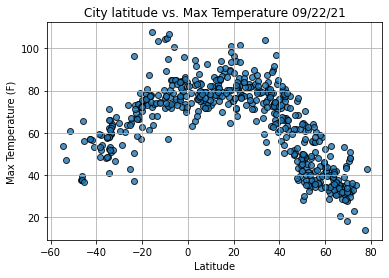

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig1.png")
          
# Show plot
plt.show()

## 6.3.2 Plot Latitude vs. Humidity

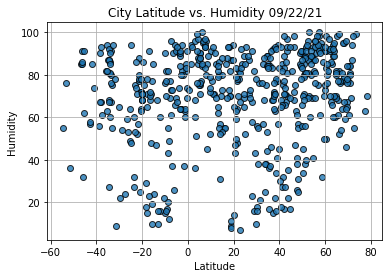

In [21]:
latitude_scatter_plot("City Latitude vs. Humidity " + time.strftime("%x"), "Humidity", humidity, "weather_data/Fig2.png")

## 6.3.3 Plot Latitude vs Cloudiness

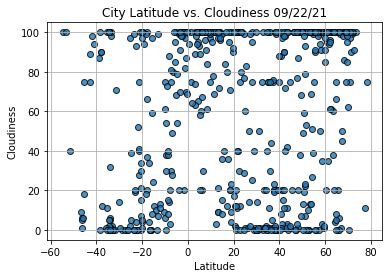

In [22]:
latitude_scatter_plot("City Latitude vs. Cloudiness " + time.strftime("%x"), "Cloudiness", cloudiness, "weather_data/Fig3.png")

## 6.3.4 Plot Latitude vs Wind Speed

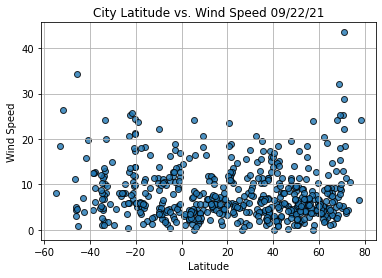

In [23]:
latitude_scatter_plot("City Latitude vs. Wind Speed " + time.strftime("%x"), "Wind Speed", wind_speed, "weather_data/Fig4.png")

## 6.4.2 Find Correlation between Latitude and Maximum Temperature

In [26]:
from scipy.stats import linregress

In [53]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    """
    Create linear regression plot based on x-values (independent variables) and y-values (dependent values)
    
    args:
        x_values: latitude values
        y_values: temperature values
        title: title for plot
        y_label: label for y axis
        text_coordinates: coordinates for annotation
    """
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # create scatter plot and plot regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # annotate text for line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    return (slope, intercept, r_value, p_value, std_err)

### Create the Hemisphere DataFrames

In [30]:
index13 = city_data_df.loc[13]
index13

City                  Alekseyevsk
Country                        RU
Date          2021-09-22 19:03:30
Lat                       57.8406
Lng                      108.3492
Max Temp                    36.81
Humidity                       92
Cloudiness                     50
Wind Speed                   1.05
Name: 13, dtype: object

In [31]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
537     True
538     True
539     True
540    False
541     True
Name: Lat, Length: 542, dtype: bool

In [34]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        542 non-null    object 
 1   Country     542 non-null    object 
 2   Date        542 non-null    object 
 3   Lat         542 non-null    float64
 4   Lng         542 non-null    float64
 5   Max Temp    542 non-null    float64
 6   Humidity    542 non-null    int64  
 7   Cloudiness  542 non-null    int64  
 8   Wind Speed  542 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 38.2+ KB


In [33]:
city_data_df.columns

Index(['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity',
       'Cloudiness', 'Wind Speed'],
      dtype='object')

In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

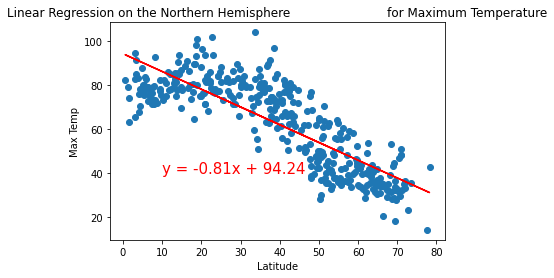

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

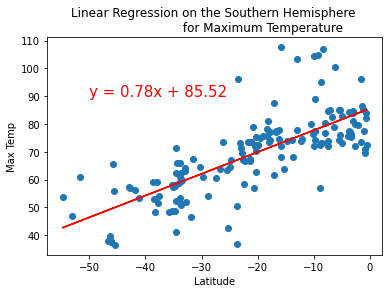

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Maximum Temperature', 'Max Temp',(-50,90))

## 6.4.3 Find Correlation Between Latitude and Percent Humidity

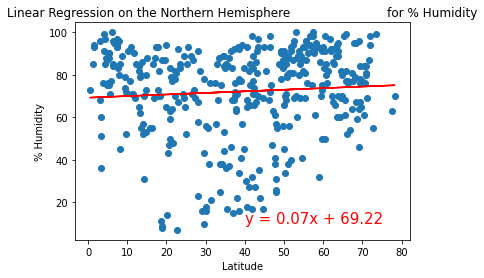

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

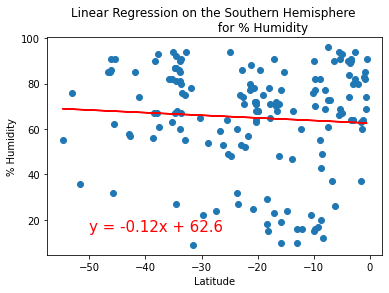

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for % Humidity', '% Humidity',(-50,15))

## Find Correlation Between Latitude and Percent Cloudiness

In [45]:
northern_hemi_df.columns

Index(['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity',
       'Cloudiness', 'Wind Speed'],
      dtype='object')

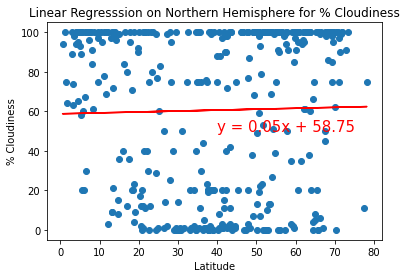

In [52]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the plot function
plot_linear_regression(x_values, y_values, 'Linear Regresssion on Northern Hemisphere for % Cloudiness', '% Cloudiness', (40,50))

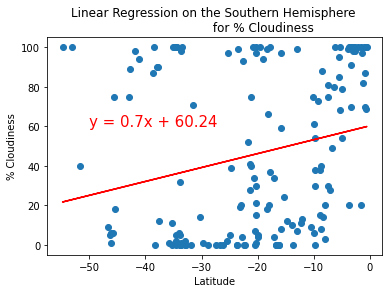

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for % Cloudiness', '% Cloudiness',(-50,60))

## 6.4.5 Find Correlation Between Latitude and Wind Speed

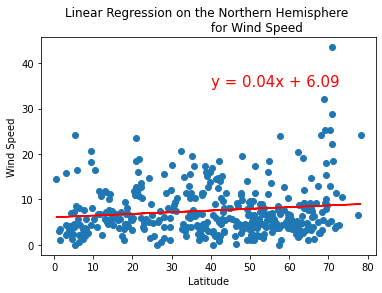

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
(slope, intercept, r_value, p_value, std_err) = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(40,35))

In [56]:
r_value

0.1326161616430866

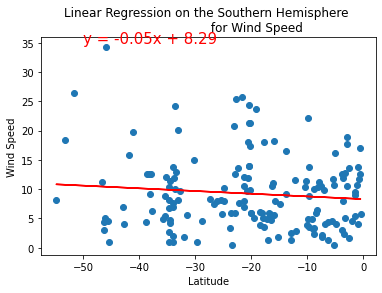

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
(slope, intercept, r_value, p_value, std_err) = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [60]:
r_value

-0.10114398086773894